# Exploratory analysis of electric data with weather

In [27]:
# import libs
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')

In [86]:
# read in file and define some useful column groupings
elec_w_weather_path = '/users/ianmyjer/desktop/disagg/electric_data_with_weather.csv'
df = pd.read_csv(elec_w_weather_path,delimiter=',',header=0,index_col=0,parse_dates=True)

In [90]:
# define useful column groupings
power_cols = ['north_br','south_br','basement','dryer','washer',
'dining_room','dishwasher','workbench','security_system',
'refrigerator','furnace_fan','garage','heat_pump',
'dhw_heater','main_house_total','office','outside_plug',
'rental_suite','entertainment','utility_room','unmetered',
'whole_house_total','oven']
weather_cols = ['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 
'Wind Spd (km/h)','Stn Press (kPa)']

## Feature Exploration

In [37]:
df[power_cols].describe()

,north_br,south_br,basement,dryer,washer,dining_room,dishwasher,workbench,security_system,refrigerator,...,dhw_heater,main_house_total,office,outside_plug,rental_suite,entertainment,utility_room,unmetered,whole_house_total,oven
count,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,...,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06,1.050780e+06
mean,1.041261e+00,2.436016e+01,3.838268e+01,5.307987e+01,4.380027e+00,6.670359e-01,1.493289e+01,1.208170e+01,3.991137e+01,5.043900e+01,...,7.287628e+00,8.603170e+02,3.544309e+01,7.382135e-03,2.503005e+02,4.098961e+01,4.693181e+01,1.986947e+02,1.112183e+03,7.887308e+00
std,8.920275e+00,3.615405e+01,1.016516e+02,4.900696e+02,3.698758e+01,2.740738e+00,1.043621e+02,2.218379e+01,2.728045e+00,7.042625e+01,...,7.503278e+00,8.268018e+02,3.012677e+01,4.297573e-01,4.122031e+02,5.720774e+01,1.134881e+01,2.864044e+02,9.461758e+02,1.479919e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,...,5.000000e+00,4.200000e+02,1.900000e+01,0.000000e+00,4.300000e+01,2.000000e+01,5.000000e+01,4.500000e+01,5.520000e+02,0.000000e+00
50%,0.000000e+00,7.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00,...,5.000000e+00,5.440000e+02,2.700000e+01,0.000000e+00,1.750000e+02,2.200000e+01,5.100000e+01,1.080000e+02,7.580000e+02,0.000000e+00
75%,0.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,4.100000e+01,1.270000e+02,...,5.000000e+00,9.420000e+02,4.200000e+01,0.000000e+00,2.780000e+02,3.300000e+01,5.200000e+01,2.220000e+02,1.256000e+03,0.000000e+00
max,6.230000e+02,1.000000e+03,1.571000e+03,5.614000e+03,1.151000e+03,5.400000e+01,8.480000e+02,1.675000e+03,5.200000e+01,1.497000e+03,...,7.400000e+01,1.170600e+04,1.012000e+03,3.050000e+02,6.920000e+03,4.540000e+02,6.500000e+01,5.258000e+03,1.226000e+04,3.896000e+03


In [45]:
df[power_cols].sum().sort_values(ascending=False)

whole_house_total    1168659826
main_house_total      904003890
rental_suite          263010809
unmetered             208784368
heat_pump             176902907
furnace_fan           121307925
dryer                  55775269
refrigerator           53000294
utility_room           49315011
entertainment          43071061
security_system        41938066
basement               40331756
office                 37242894
south_br               25597174
dishwasher             15691187
workbench              12695213
oven                    8287825
dhw_heater              7657694
washer                  4602445
garage                  1645127
north_br                1094136
dining_room              700908
outside_plug               7757
dtype: int64

In [46]:
df[power_cols].mean().sort_values(ascending=False)

whole_house_total    1112.183165
main_house_total      860.316993
rental_suite          250.300547
unmetered             198.694653
heat_pump             168.353896
furnace_fan           115.445598
dryer                  53.079873
refrigerator           50.439002
utility_room           46.931814
entertainment          40.989609
security_system        39.911367
basement               38.382683
office                 35.443094
south_br               24.360165
dishwasher             14.932895
workbench              12.081704
oven                    7.887308
dhw_heater              7.287628
washer                  4.380027
garage                  1.565625
north_br                1.041261
dining_room             0.667036
outside_plug            0.007382
dtype: float64

In [ ]:
# try to filter out times when each system is basically off
# perhaps do it by taking only top 75% of data?
df[power_cols][df[power_cols] > 10]

## Feature Engineering

In [96]:
# time-based features
df['weekday'] = (df.index.weekday < 5)*1
df['business_hours'] = (df.index.weekday < 5)&(df.index.hour>=9)&(df.index.hour<=17)*1
df['hour'] = df.index.hour

In [11]:
# season-based features
df['winter'] = (df.index.month<=3)*1
df['spring'] = (df.index.month>3)&(df.index.month<=6)*1
df['summer'] = (df.index.month>6)&(df.index.month<=9)*1

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3c4198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fd014a8>]], dtype=object)

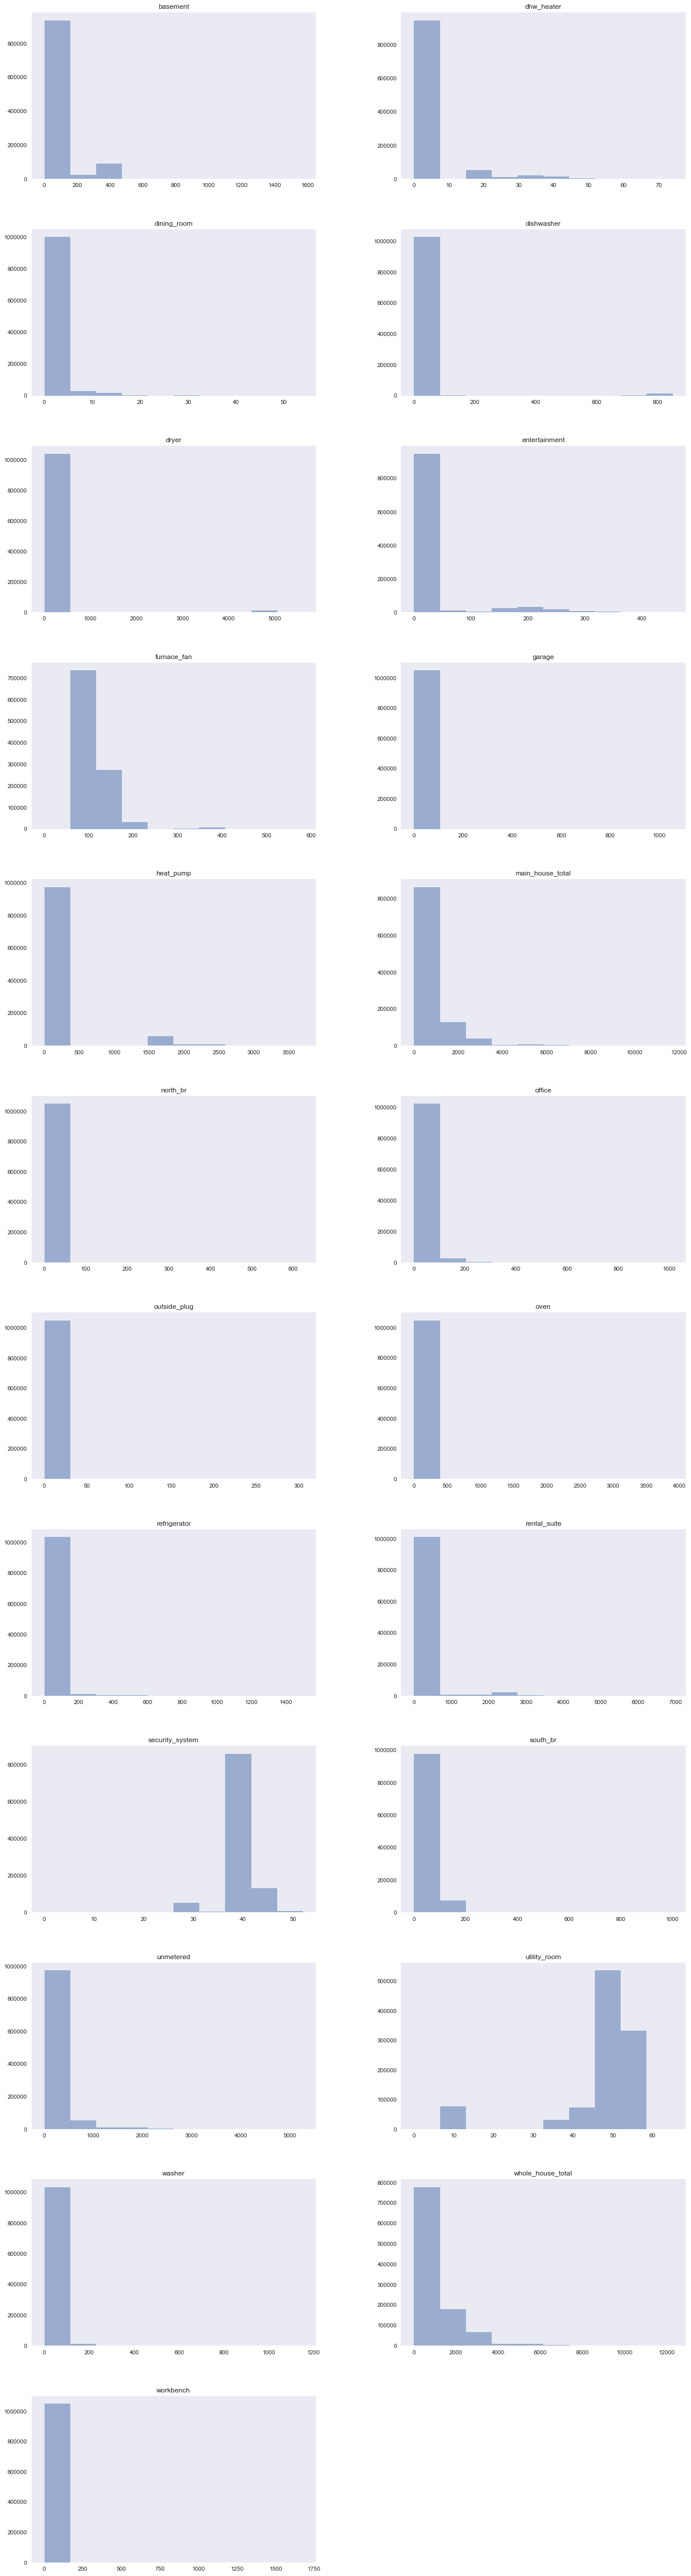

In [25]:
df[power_cols].hist(alpha=0.5,grid=False,layout=(12,2),figsize=(20,80))

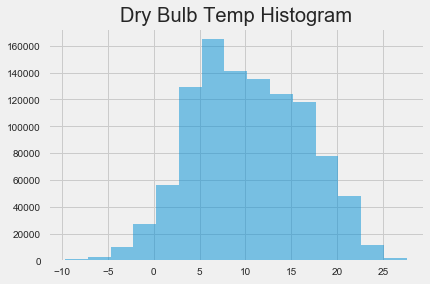

In [37]:
ax = df['Temp (C)'].hist(alpha=0.5,bins=15)
ax.set_title('Dry Bulb Temp Histogram')
# It doesn't get that hot in Canada (25 C is 77 F)

## Box Plots

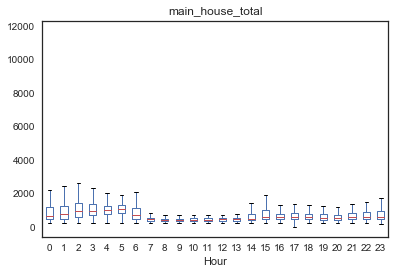

In [21]:
ax = df.boxplot(column='main_house_total',by ='hour',grid=False)
plt.suptitle("") # get rid of stupid auto title

## Line Plots

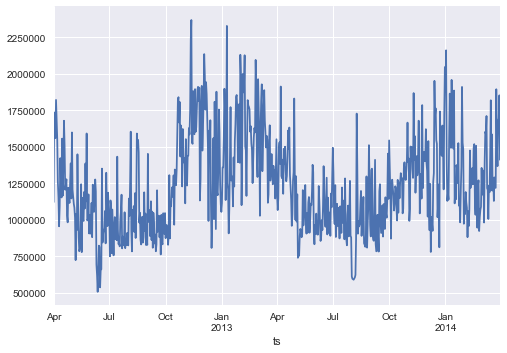

In [9]:
df['main_house_total'].resample('D').sum().plot()

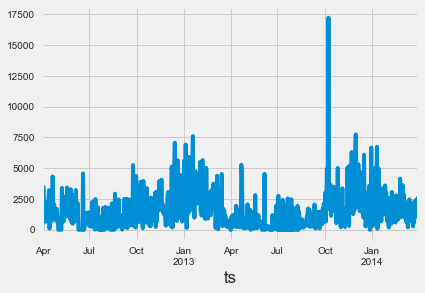

In [50]:
df['north_br'].resample('D').sum().plot()

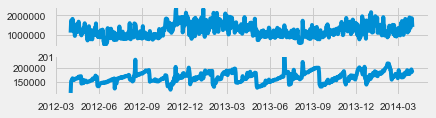

In [45]:
# time series dual plot
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(5, 1) # rows and columns
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])

ax1.plot(df['main_house_total'].resample('D').sum())
ax2.plot(df['furnace_fan'].resample('D').sum())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b510cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dab8588>]], dtype=object)

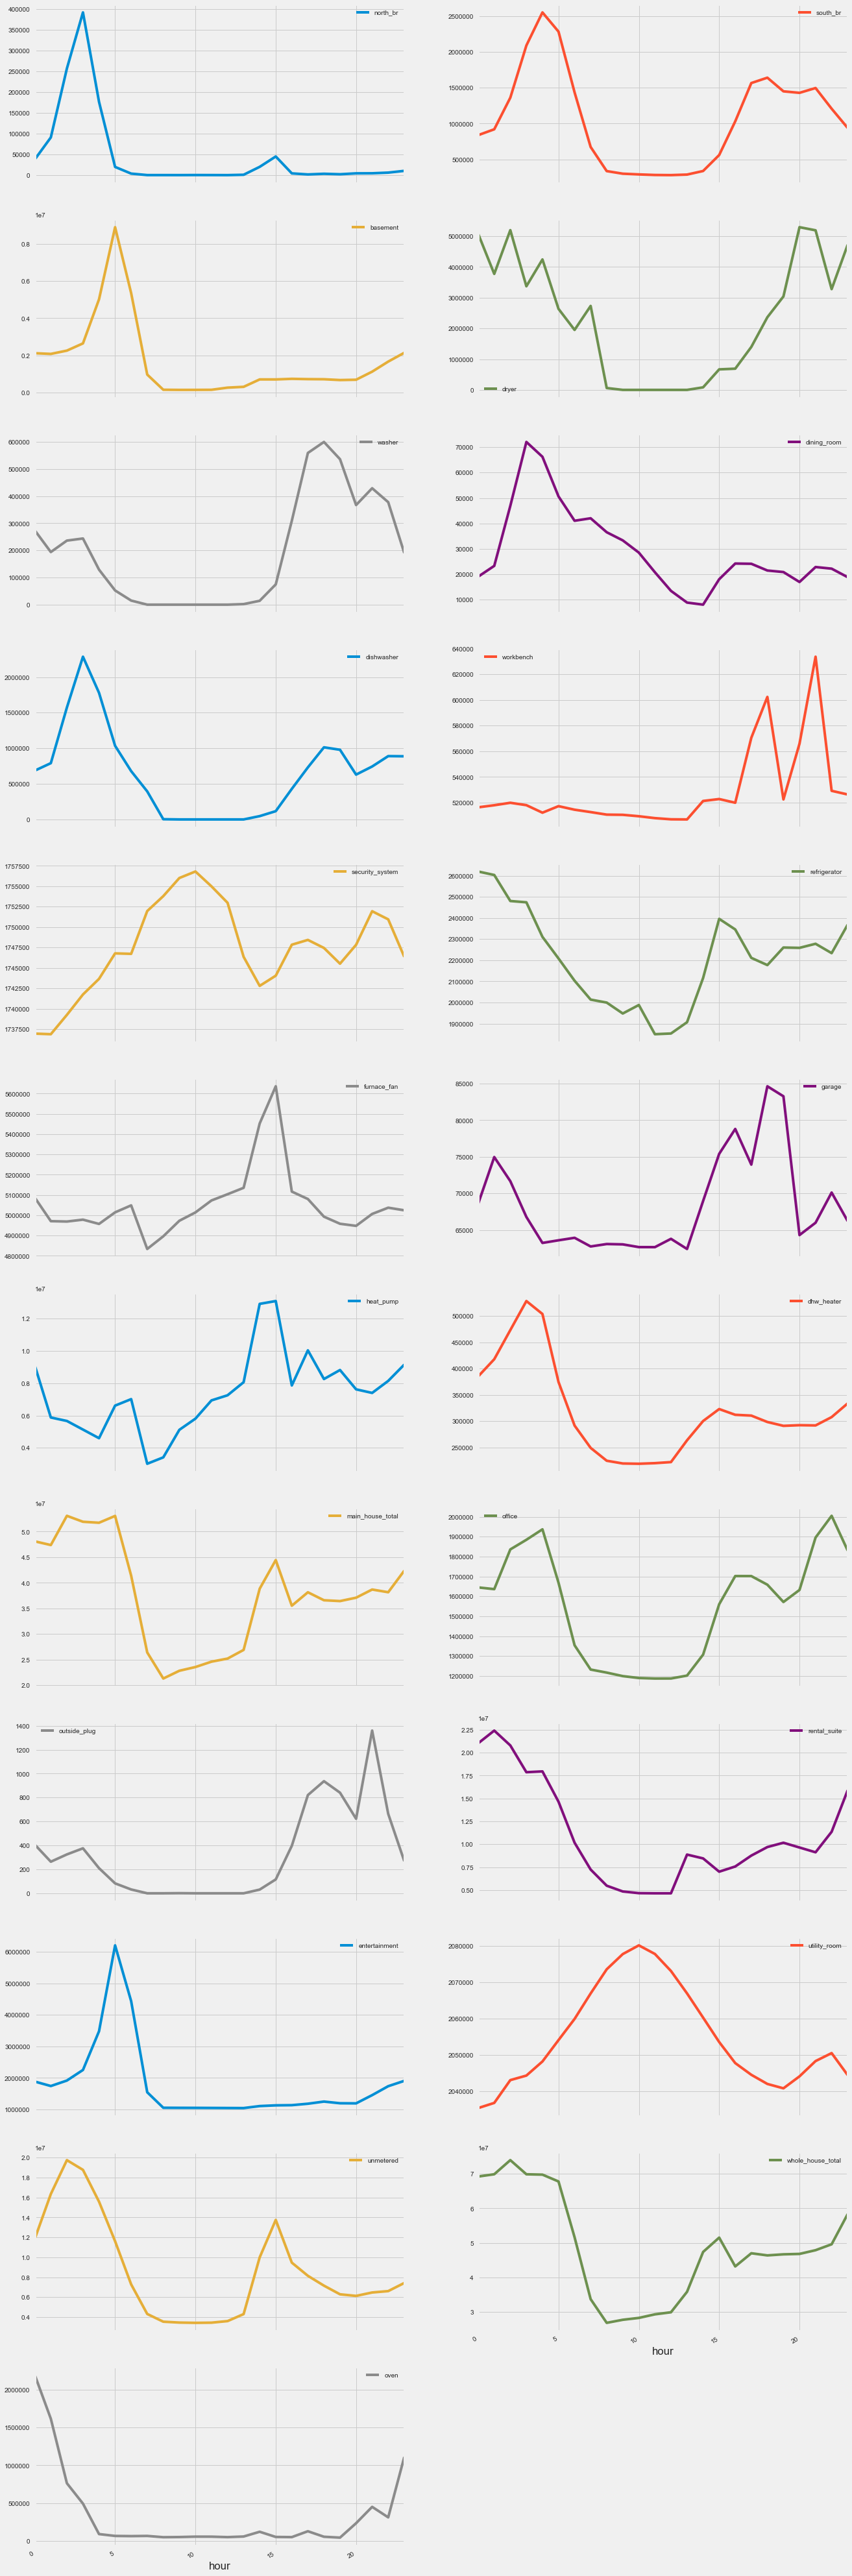

In [103]:
# each power_col plotted against the hour
plot_cols = list(power_cols)
plot_cols.append('hour')
a = df[plot_cols].groupby('hour').sum()
a.plot(subplots=True, layout=(12,2),sharex=True,figsize=(20,80))

## Scatterplots

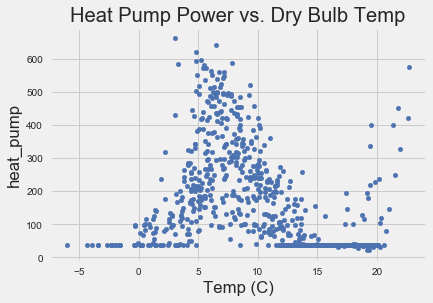

In [31]:
# Expecting heat pump to be temperature dependent
# but maybe they rarely use it because it doesn't get that hot
ax = df.resample('D').mean().plot.scatter('Temp (C)','heat_pump')
ax.set_title('Heat Pump Power vs. Dry Bulb Temp')

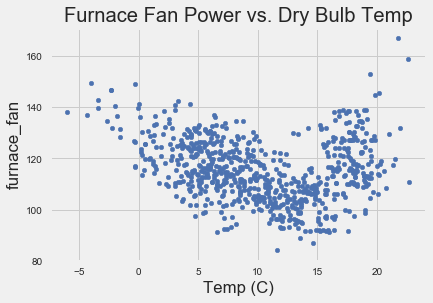

In [32]:
# it seems their furnace fan is also used for recirculating air
# even during the summer. As observed by constant base load
ax = df.resample('D').mean().plot.scatter('Temp (C)','furnace_fan')
ax.set_title('Furnace Fan Power vs. Dry Bulb Temp')

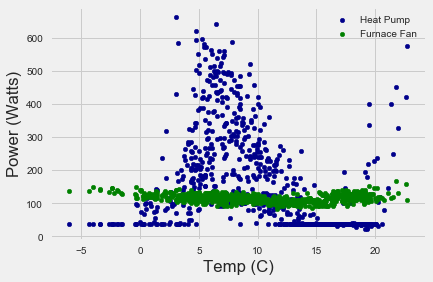

In [30]:
ax = df.resample('D').mean().plot.scatter('Temp (C)','heat_pump',color='DarkBlue',label='Heat Pump')
df.resample('D').mean().plot.scatter('Temp (C)','furnace_fan',color='Green',label='Furnace Fan',ax=ax)
ax.set_ylabel('Power (Watts)')